In [7]:
import pandas as pd

raw_data = {'Type': ['Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama'], 
        'Length': ['Short', 'Medium', "Medium", 'Long', 'Medium', 'Short', 'Short', 'Medium'], 
        'IMDb_Rating': [7.2, 9.3, 5.1, 6.9, 8.3, 4.5, 8, 7.5], 
        'Liked': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes']}
df = pd.DataFrame(raw_data, columns = ['Type', 'Length', 'IMDb_Rating', 'Liked'])
df.to_csv('example.csv')
df

,Type,Length,IMDb_Rating,Liked
0,Comedy,Short,7.2,Yes
1,Drama,Medium,9.3,Yes
2,Comedy,Medium,5.1,No
3,Drama,Long,6.9,No
4,Drama,Medium,8.3,Yes
5,Drama,Short,4.5,No
6,Comedy,Short,8.0,Yes
7,Drama,Medium,7.5,Yes


In [8]:
df_test = pd.read_csv('example.csv')
df_test

,Unnamed: 0,Type,Length,IMDb_Rating,Liked
0,0,Comedy,Short,7.2,Yes
1,1,Drama,Medium,9.3,Yes
2,2,Comedy,Medium,5.1,No
3,3,Drama,Long,6.9,No
4,4,Drama,Medium,8.3,Yes
5,5,Drama,Short,4.5,No
6,6,Comedy,Short,8.0,Yes
7,7,Drama,Medium,7.5,Yes


In [9]:
df.dtypes

Type            object
Length          object
IMDb_Rating    float64
Liked           object
dtype: object

In [17]:
display(df.head())

,Type,Length,IMDb_Rating,Liked
0,Comedy,Short,7.2,Yes
1,Drama,Medium,9.3,Yes
2,Comedy,Medium,5.1,No
3,Drama,Long,6.9,No
4,Drama,Medium,8.3,Yes


In [18]:
data_dummies = pd.get_dummies(df)
data_dummies

,IMDb_Rating,Type_Comedy,Type_Drama,Length_Long,Length_Medium,Length_Short,Liked_No,Liked_Yes
0,7.2,1,0,0,0,1,0,1
1,9.3,0,1,0,1,0,0,1
2,5.1,1,0,0,1,0,1,0
3,6.9,0,1,1,0,0,1,0
4,8.3,0,1,0,1,0,0,1
5,4.5,0,1,0,0,1,1,0
6,8.0,1,0,0,0,1,0,1
7,7.5,0,1,0,1,0,0,1


In [22]:
y = data_dummies['Liked_Yes'].values
y

array([1, 1, 0, 0, 1, 0, 1, 1], dtype=uint8)

In [26]:
X = data_dummies.loc[:, 'IMDb_Rating':'Length_Short'].values
X

array([[ 7.2,  1. ,  0. ,  0. ,  0. ,  1. ],
       [ 9.3,  0. ,  1. ,  0. ,  1. ,  0. ],
       [ 5.1,  1. ,  0. ,  0. ,  1. ,  0. ],
       [ 6.9,  0. ,  1. ,  1. ,  0. ,  0. ],
       [ 8.3,  0. ,  1. ,  0. ,  1. ,  0. ],
       [ 4.5,  0. ,  1. ,  0. ,  0. ,  1. ],
       [ 8. ,  1. ,  0. ,  0. ,  0. ,  1. ],
       [ 7.5,  0. ,  1. ,  0. ,  1. ,  0. ]])

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_giniIndex = DecisionTreeClassifier().fit(X, y)

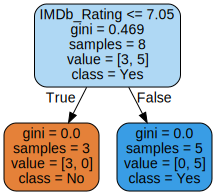

In [43]:
%matplotlib inline
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(tree_giniIndex, out_file=None, feature_names=['IMDb_Rating', 'Type_Comedy', 'Type_Drama', 'Length_Long', 'Length_Medium', 'Length_Short'], class_names=['No', 'Yes'], filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

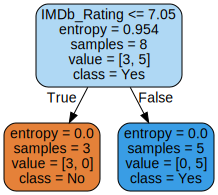

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_entropy = DecisionTreeClassifier(criterion="entropy").fit(X, y)

dot_data = tree.export_graphviz(tree_entropy, out_file=None, feature_names=['IMDb_Rating', 'Type_Comedy', 'Type_Drama', 'Length_Long', 'Length_Medium', 'Length_Short'], class_names=['No', 'Yes'], filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

In [45]:
tree_entropy.predict([[6.5, 1, 0, 0, 1, 0]])

array([0], dtype=uint8)

In [46]:
tree_entropy.predict([[8.5, 1, 0, 0, 1, 0]])

array([1], dtype=uint8)

In [47]:
from sklearn.naive_bayes import GaussianNB

gaussian_model = GaussianNB()
gaussian_model.fit(X, y)

GaussianNB(priors=None)